# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from statistics import mean 

ModuleNotFoundError: No module named 'skimage'

In [10]:
from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [11]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

# Inicie sua análise a partir da parte 1 a partir daqui

# Geral sobre Variância e Desvio Padrão
A variância e o desvio padrão são medidas que dão uma ideia da dispersão de uma distribuição de dados. Um valor alto para a variância (ou desvio padrão) indica que os valores observados tendem a estar distantes da média – ou seja, a distribuição é mais “espalhada”. ... A variância é a média desses desvios ao quadrado. <br><br>

## Sobre variância

Dado um conjunto de dados, a variância é uma medida de dispersão que mostra o quão distante cada valor desse conjunto está do valor central (médio).
Quanto menor é a variância, mais próximos os valores estão da média; mas quanto maior ela é, mais os valores estão distantes da média. A variância é a média desses desvios ao quadrado --> Diferença para desvio padrão <br><br>

## Desvio Padrão

Em probabilidade, o desvio padrão ou desvio padrão populacional (comumente representado pela letra grega {\displaystyle \sigma }\sigma) é uma medida de dispersão em torno da média 
populacional de uma variável aleatória. O termo possui também uma acepção específica no campo da estatística, na qual também é chamado de desvio padrão amostral (comumente representado 
pela letra latina {\displaystyle s}s) e indica uma medida de dispersão dos dados em torno de média amostral. Um baixo desvio padrão indica que os pontos dos dados tendem a estar próximos 
da média ou do valor esperado.[1] Um alto desvio padrão indica que os pontos dos dados estão espalhados por uma ampla gama de valores.<br><br><br><br>

# Geral sobre Probabilidade 
### Discrete Probability Distributions
Discrete probability functions are also known as probability mass functions and can assume a discrete number of values. For example, coin tosses and counts of events are discrete functions. These are discrete distributions because there are no in-between values. For example, you can have only heads or tails in a coin toss. Similarly, if you’re counting the number of books that a library checks out per hour, you can count 21 or 22 books, but nothing in between.




### Types of Discrete Distribution
There are a variety of discrete probability distributions that you can use to model different types of data. The correct discrete distribution depends on the properties of your data. For example, use the:

- Binomial distribution to model binary data, such as coin tosses.
- Poisson distribution to model count data, such as the count of library book checkouts per hour.
- Uniform distribution to model multiple events with the same probability, such as rolling a die.




### Continuous Probability Distributions
Probabilities for continuous distributions are measured over ranges of values rather than single points. A probability indicates the likelihood that a value will fall within an interval. 
The most well-known continuous distribution is the normal distribution, which is also known as the Gaussian distribution or the “bell curve.” This symmetric distribution fits a wide variety of phenomena, such as human height and IQ scores. It has two parameters—the mean and the standard deviation. The Weibull distribution and the lognormal distribution are other common continuous distributions. Both of these distributions can fit skewed data.
Distribution parameters are values that apply to entire populations. Unfortunately, population parameters are generally unknown because it’s usually impossible to measure an entire population. However, you can use random samples to calculate estimates of these parameters.

<img src="https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2018/04/IQ_score_distribution.png?w=576&ssl=1">

Examine the properties of the probability plot above. We can see that it is a symmetric distribution where values occur most frequently around 100, which is the mean. The probabilities drops-off as you move away from the mean in both directions. The shaded area for the range of IQ scores between 120-140 contains 8.738% of the total area under the curve. Therefore, the likelihood that an IQ score falls within this range is 0.08738.


## Probabilidade PPF , ECDF , CDF

https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python/

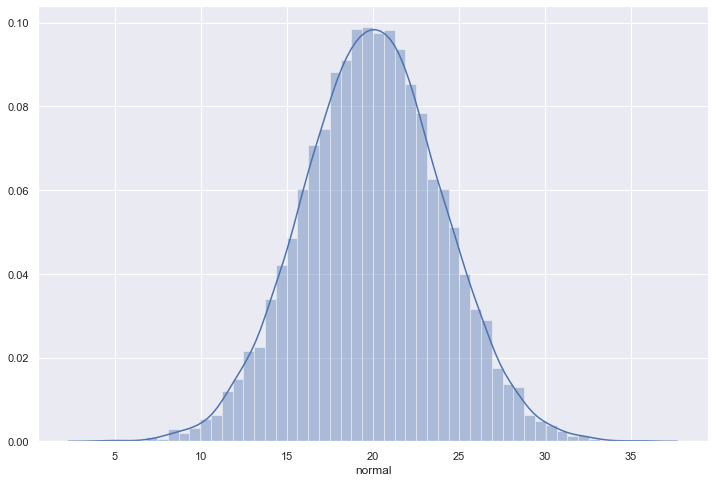

In [12]:
# Sua análise da parte 1 começa aqui.
sns.distplot(dataframe['normal'])

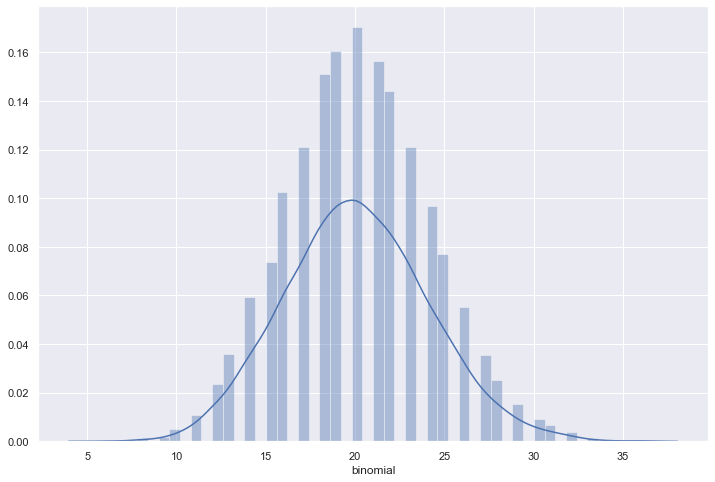

In [13]:
sns.distplot(dataframe['binomial'])

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis 'normal' e 'binomial' de 'dataframe' ? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam q1_norm, q2_norm e q3_norm os quantis da variável normal e q1_binom, q2_binom e q3_binom os quantis da variável binom, qual a diferença (q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom) ?

In [25]:
def q1():
    Q1, Q2, Q3 = 0.25, 0.5, 0.75
    norm_quantis = dataframe['normal'].quantile([Q1, Q2, Q3])
    binom_quantis = dataframe['binomial'].quantile([Q1, Q2, Q3])
    zip_quantis = zip(norm_quantis, binom_quantis)
    return tuple(round(q[0] - q[1], 3) for q in zip_quantis)
    pass

In [26]:
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

# Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [27]:
def q2():
    serie = dataframe['normal']
    x_ = serie.mean()
    s = serie.std()
    interval_min = x_ - s
    interval_max = x_ + s
    ecdf = ECDF(serie)
    interval = ecdf(interval_max) - ecdf(interval_min)
    return float(round(interval, 3))
    pass

In [28]:
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [34]:
def q3():
    return (round(dataframe['binomial'].mean() - dataframe['normal'].mean(),3),round(dataframe['binomial'].var() - dataframe['normal'].var(),3))
    pass

In [35]:
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [36]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [37]:
# Sua análise da parte 2 começa aqui.
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [38]:
stars.dtypes

mean_profile    float64
sd_profile      float64
kurt_profile    float64
skew_profile    float64
mean_curve      float64
sd_curve        float64
kurt_curve      float64
skew_curve      float64
target             bool
dtype: object

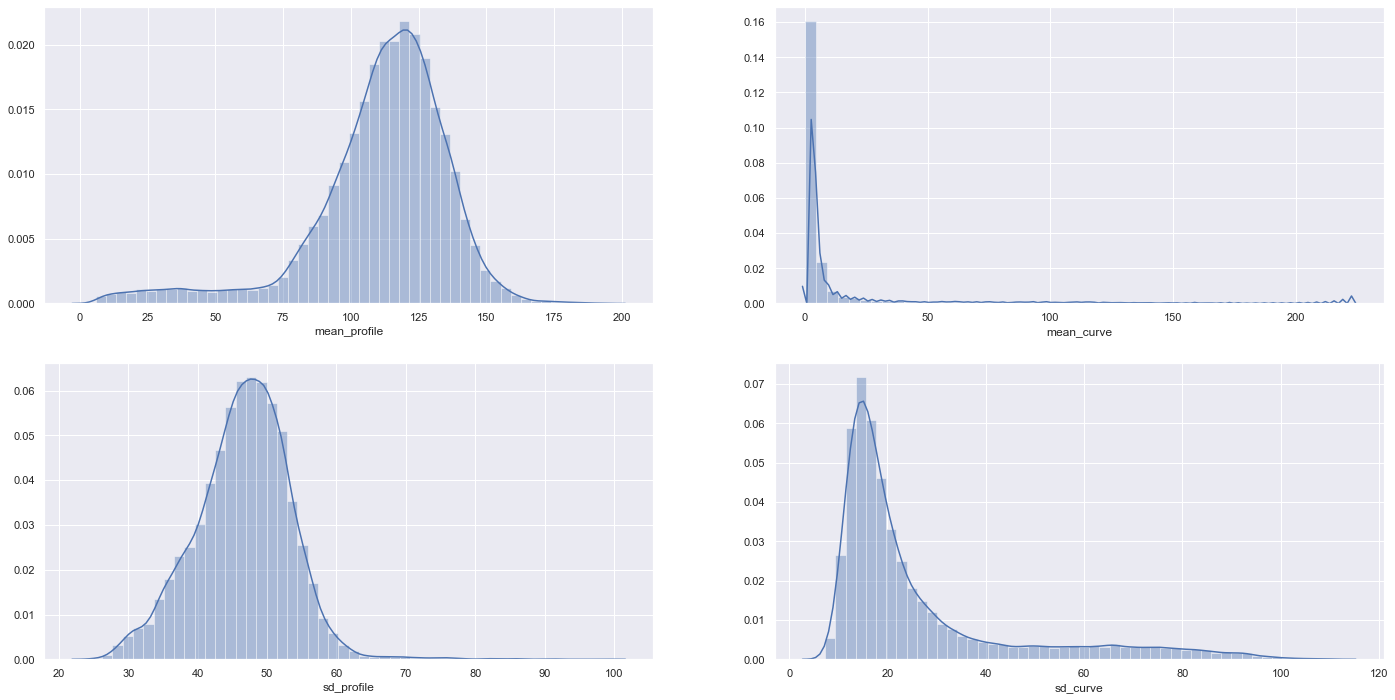

In [39]:
f, axes = plt.subplots(2, 2, figsize=(24, 12), sharex=False)

sns.distplot(stars['mean_profile'],ax=axes[0,0])
sns.distplot(stars['mean_curve'],ax=axes[0,1])
sns.distplot(stars['sd_profile'],ax=axes[1,0])
sns.distplot(stars['sd_curve'],ax=axes[1,1])

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [40]:
def q4():
    srFilter = stars[stars['target']==False]['mean_profile']
    false_pulsar_mean_profile_standardized = (srFilter - srFilter.mean())/srFilter.std()
    quantis = sct.norm.ppf([0.80, 0.90, 0.95])
    ecdf_vals = ECDF(false_pulsar_mean_profile_standardized)
    resultado = ecdf_vals([quantis])[0]
    return tuple(resultado.round(3))
    pass

In [41]:
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [42]:
def q5():
    srFilter = stars[stars['target']==False]['mean_profile']
    false_pulsar_mean_profile_standardized = (srFilter - srFilter.mean())/srFilter.std()
    return tuple((false_pulsar_mean_profile_standardized.quantile([0.25,0.5,0.75]) - sct.norm.ppf([0.25, 0.50, 0.75])).round(3))
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.